# CODSOFT - Data Science Internship
# Task:4: Sale Advertising Prediction #
## Name: Faizan Tanveer

#### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### 1. Reading Data

In [2]:
data=pd.read_csv("advertising.csv")
advertisment=data.copy()

We can see following columns (i.e. features) of our dataset and their certain attributes below:

In [3]:
advertisment

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
advertisment.shape

(200, 4)

In [5]:
advertisment.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
advertisment.describe(include="all")

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### 2. Completeness

Checking for the missing values in our dataset.

In [7]:
advertisment.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### 3. Exploration

<AxesSubplot:xlabel='TV', ylabel='Sales'>

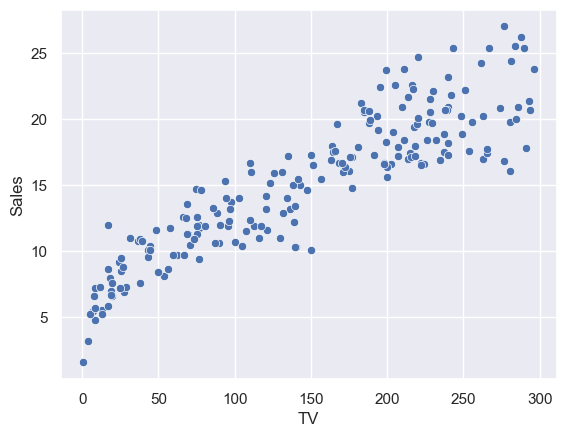

In [8]:
sns.scatterplot(x='TV', y='Sales', data=advertisment)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

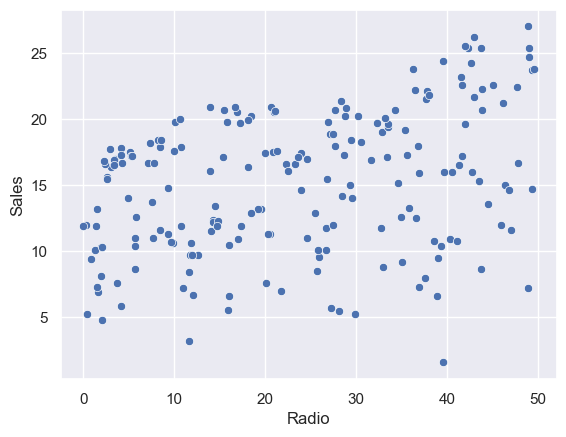

In [9]:
sns.scatterplot(x='Radio', y='Sales', data=advertisment)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

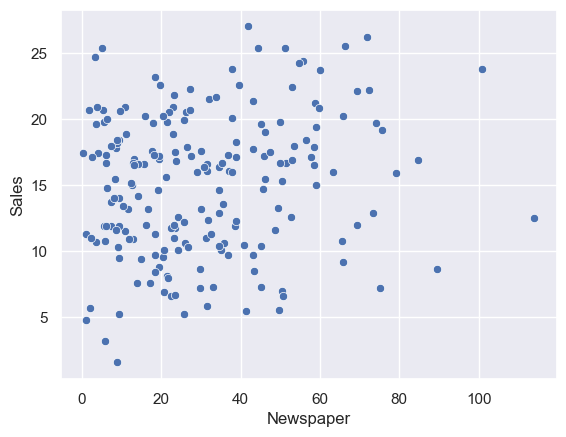

In [10]:
sns.scatterplot(x='Newspaper', y='Sales', data=advertisment)

### 4. Feature Engineering

### Adding columns
Now, we will add few columns by converting the existing columns of continous numerical values into categorical class for better readiability and visualization.

In [11]:
sales=advertisment.copy()

In [12]:
sales.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### a. TV_ads

In [14]:
sales['TV_ads'] = ''
sales.loc[(sales['TV']<50) & (sales['TV']>=0), 'TV_ads'] = '0-49'
sales.loc[(sales['TV']<100) & (sales['TV']>=50), 'TV_ads'] = '50-99'
sales.loc[(sales['TV']<150) & (sales['TV']>=100), 'TV_ads'] = '100-149'
sales.loc[(sales['TV']<200) & (sales['TV']>=150), 'TV_ads'] = '150-199'
sales.loc[(sales['TV']<250) & (sales['TV']>=200), 'TV_ads'] = '200-249'
sales.loc[(sales['TV']<300) & (sales['TV']>=250), 'TV_ads'] = '250-299'
sales.loc[(sales['TV']>=301), 'TV_ads'] = '300+'

In [15]:
sales.head()

,TV,Radio,Newspaper,Sales,TV_ads
0,230.1,37.8,69.2,22.1,200-249
1,44.5,39.3,45.1,10.4,0-49
2,17.2,45.9,69.3,12.0,0-49
3,151.5,41.3,58.5,16.5,150-199
4,180.8,10.8,58.4,17.9,150-199


#### b. Radio_ads

In [16]:
sales['Radio_ads'] = ''
sales.loc[(sales['Radio']<10) & (sales['Radio']>=0), 'Radio_ads'] = '0-9'
sales.loc[(sales['Radio']<20) & (sales['Radio']>=10), 'Radio_ads'] = '10-19'
sales.loc[(sales['Radio']<30) & (sales['Radio']>=20), 'Radio_ads'] = '20-29'
sales.loc[(sales['Radio']<40) & (sales['Radio']>=30), 'Radio_ads'] = '30-39'
sales.loc[(sales['Radio']<50) & (sales['Radio']>=40), 'Radio_ads'] = '40-49'
sales.loc[(sales['Radio']>=50), 'Radio_ads'] = '50+'

In [17]:
sales.head()

,TV,Radio,Newspaper,Sales,TV_ads,Radio_ads
0,230.1,37.8,69.2,22.1,200-249,30-39
1,44.5,39.3,45.1,10.4,0-49,30-39
2,17.2,45.9,69.3,12.0,0-49,40-49
3,151.5,41.3,58.5,16.5,150-199,40-49
4,180.8,10.8,58.4,17.9,150-199,10-19


#### c. Newspaper_ads

In [18]:
sales['Newspaper_ads'] = ''
sales.loc[(sales['Newspaper']<25) & (sales['Newspaper']>=0), 'Newspaper_ads'] = '0-24'
sales.loc[(sales['Newspaper']<50) & (sales['Newspaper']>=25), 'Newspaper_ads'] = '25-49'
sales.loc[(sales['Newspaper']<75) & (sales['Newspaper']>=50), 'Newspaper_ads'] = '50-74'
sales.loc[(sales['Newspaper']<100) & (sales['Newspaper']>=75), 'Newspaper_ads'] = '75-99'
sales.loc[(sales['Newspaper']<125) & (sales['Newspaper']>=100), 'Newspaper_ads'] = '100-124'
sales.loc[(sales['Newspaper']>=125), 'Newspaper_ads'] = '125+'

In [19]:
sales.head()

,TV,Radio,Newspaper,Sales,TV_ads,Radio_ads,Newspaper_ads
0,230.1,37.8,69.2,22.1,200-249,30-39,50-74
1,44.5,39.3,45.1,10.4,0-49,30-39,25-49
2,17.2,45.9,69.3,12.0,0-49,40-49,50-74
3,151.5,41.3,58.5,16.5,150-199,40-49,50-74
4,180.8,10.8,58.4,17.9,150-199,10-19,50-74


<AxesSubplot:xlabel='TV_ads', ylabel='count'>

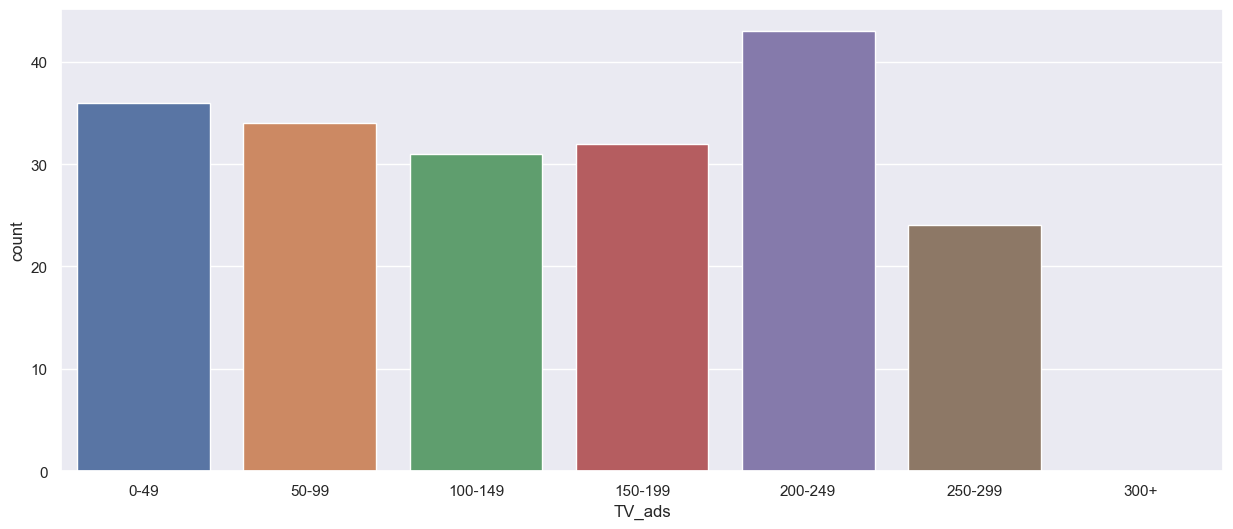

In [20]:
order_TV_ads=['0-49','50-99','100-149', '150-199', '200-249', '250-299', '300+']
plt.figure(figsize=(15,6))
sns.countplot(data=sales, x='TV_ads', order=order_TV_ads)

In [21]:
# plt.figure(figsize=(15,6))
# sns.histplot(data=sales, x='TV_ads')

<AxesSubplot:xlabel='TV_ads', ylabel='Sales'>

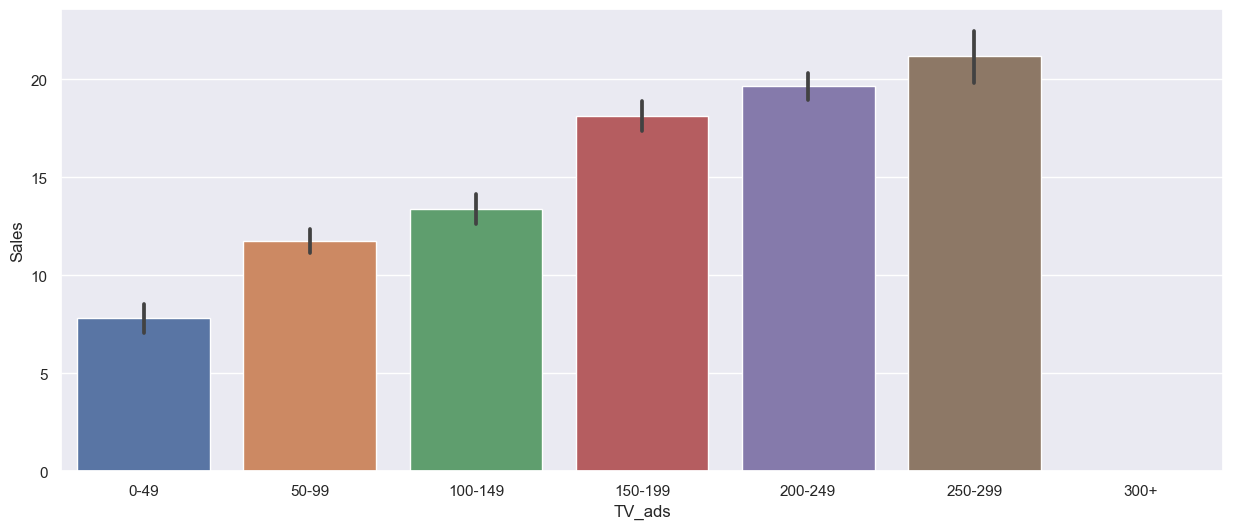

In [22]:
order_TV_ads=['0-49','50-99','100-149', '150-199', '200-249', '250-299', '300+']
plt.figure(figsize=(15,6))
sns.barplot(data=sales, x='TV_ads', y='Sales', order=order_TV_ads)

<AxesSubplot:xlabel='Radio_ads', ylabel='count'>

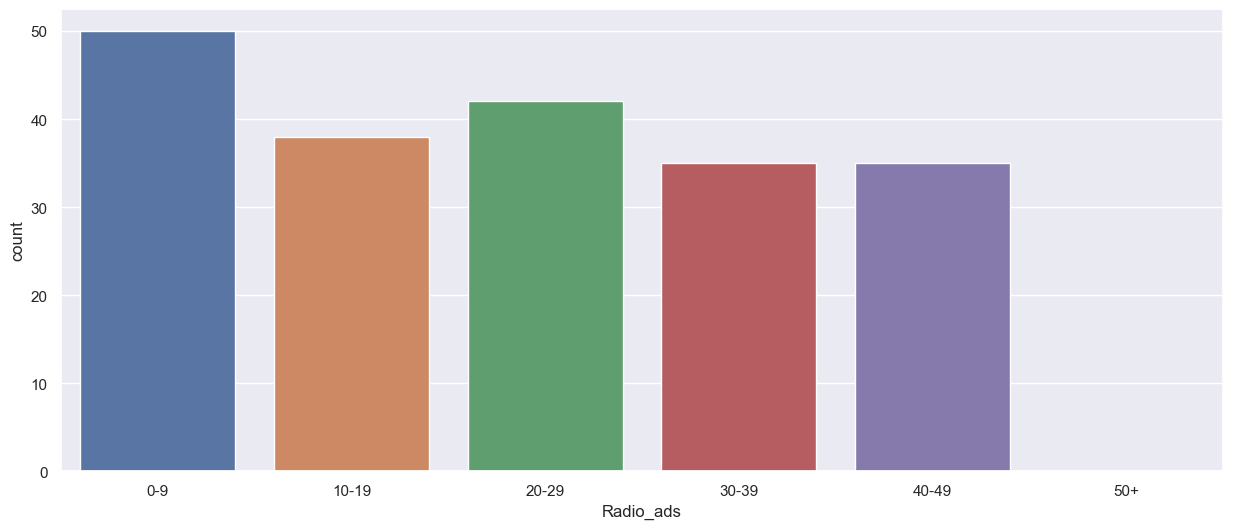

In [23]:
order_Radio_ads=['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
plt.figure(figsize=(15,6))
sns.countplot(data=sales, x='Radio_ads', order=order_Radio_ads)

In [24]:
# plt.figure(figsize=(15,6))
# sns.histplot(data=sales, x='Radio_ads')

<AxesSubplot:xlabel='Radio_ads', ylabel='Sales'>

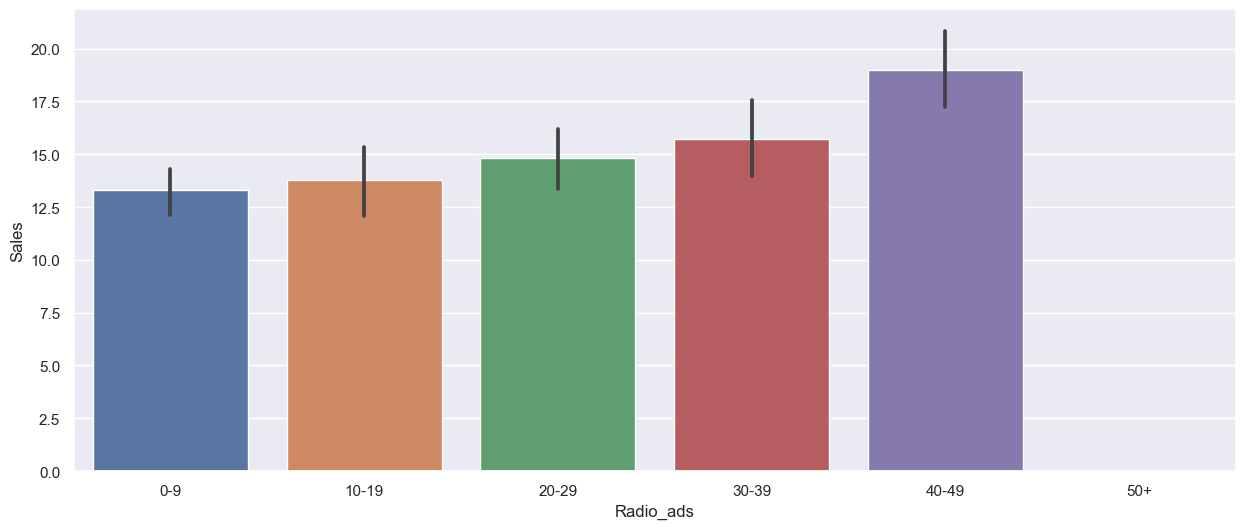

In [25]:
order_Radio_ads=['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
plt.figure(figsize=(15,6))
sns.barplot(data=sales, x='Radio_ads', y='Sales', order=order_Radio_ads)

<AxesSubplot:xlabel='Newspaper_ads', ylabel='count'>

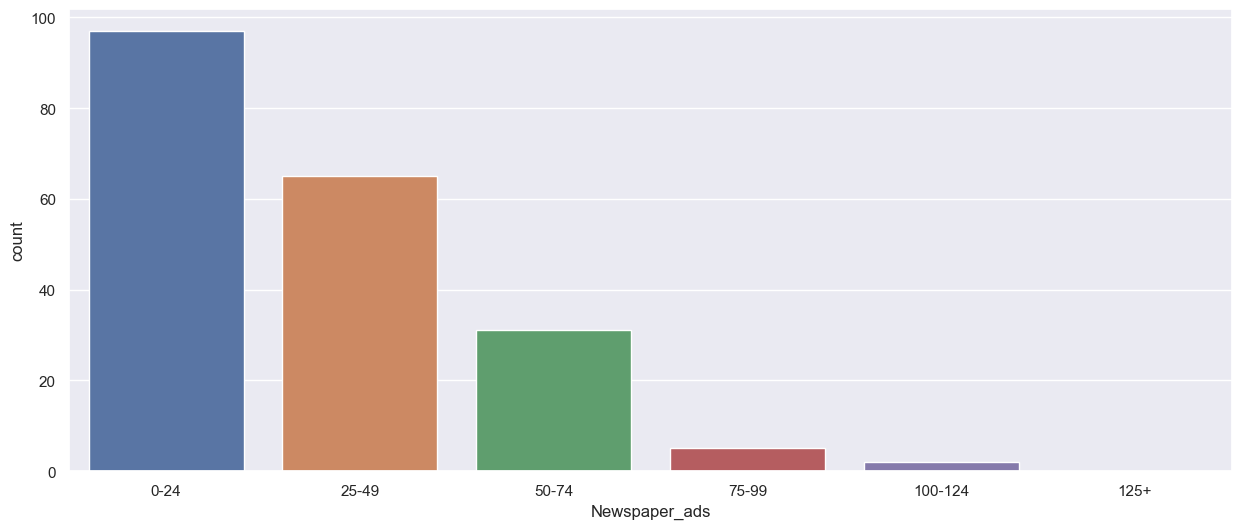

In [26]:
order_Newspaper_ads=['0-24','25-49','50-74','75-99','100-124','125+']
plt.figure(figsize=(15,6))
sns.countplot(data=sales, x='Newspaper_ads', order=order_Newspaper_ads)

In [27]:
# plt.figure(figsize=(15,6))
# sns.histplot(data=sales, x='Newspaper_ads')

<AxesSubplot:xlabel='Newspaper_ads', ylabel='Sales'>

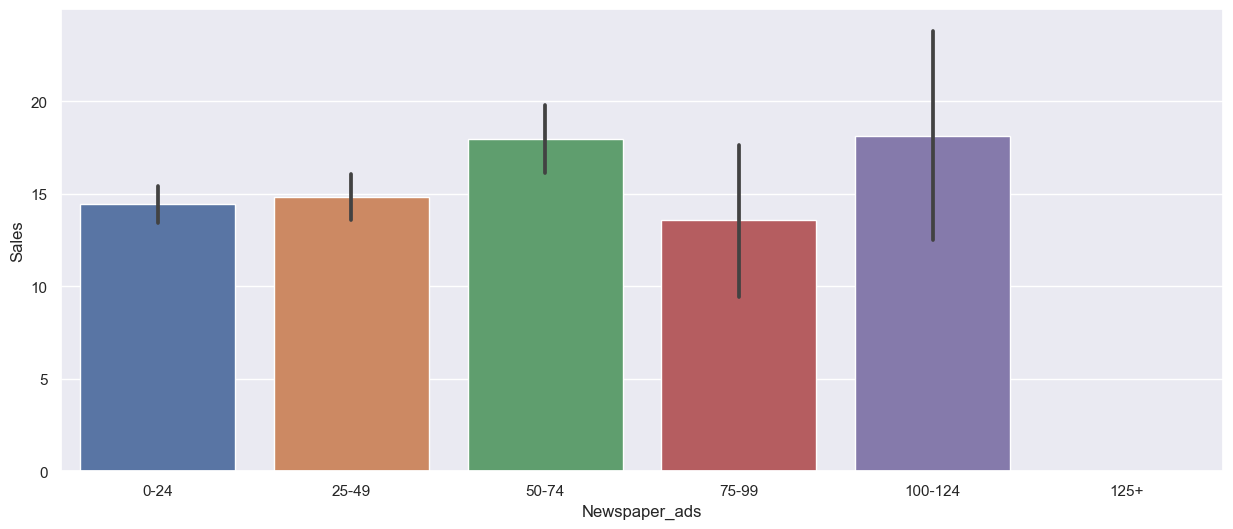

In [28]:
order_Newspaper_ads=['0-24','25-49','50-74','75-99','100-124','125+']
plt.figure(figsize=(15,6))
sns.barplot(data=sales, x='Newspaper_ads', y='Sales', order=order_Newspaper_ads)

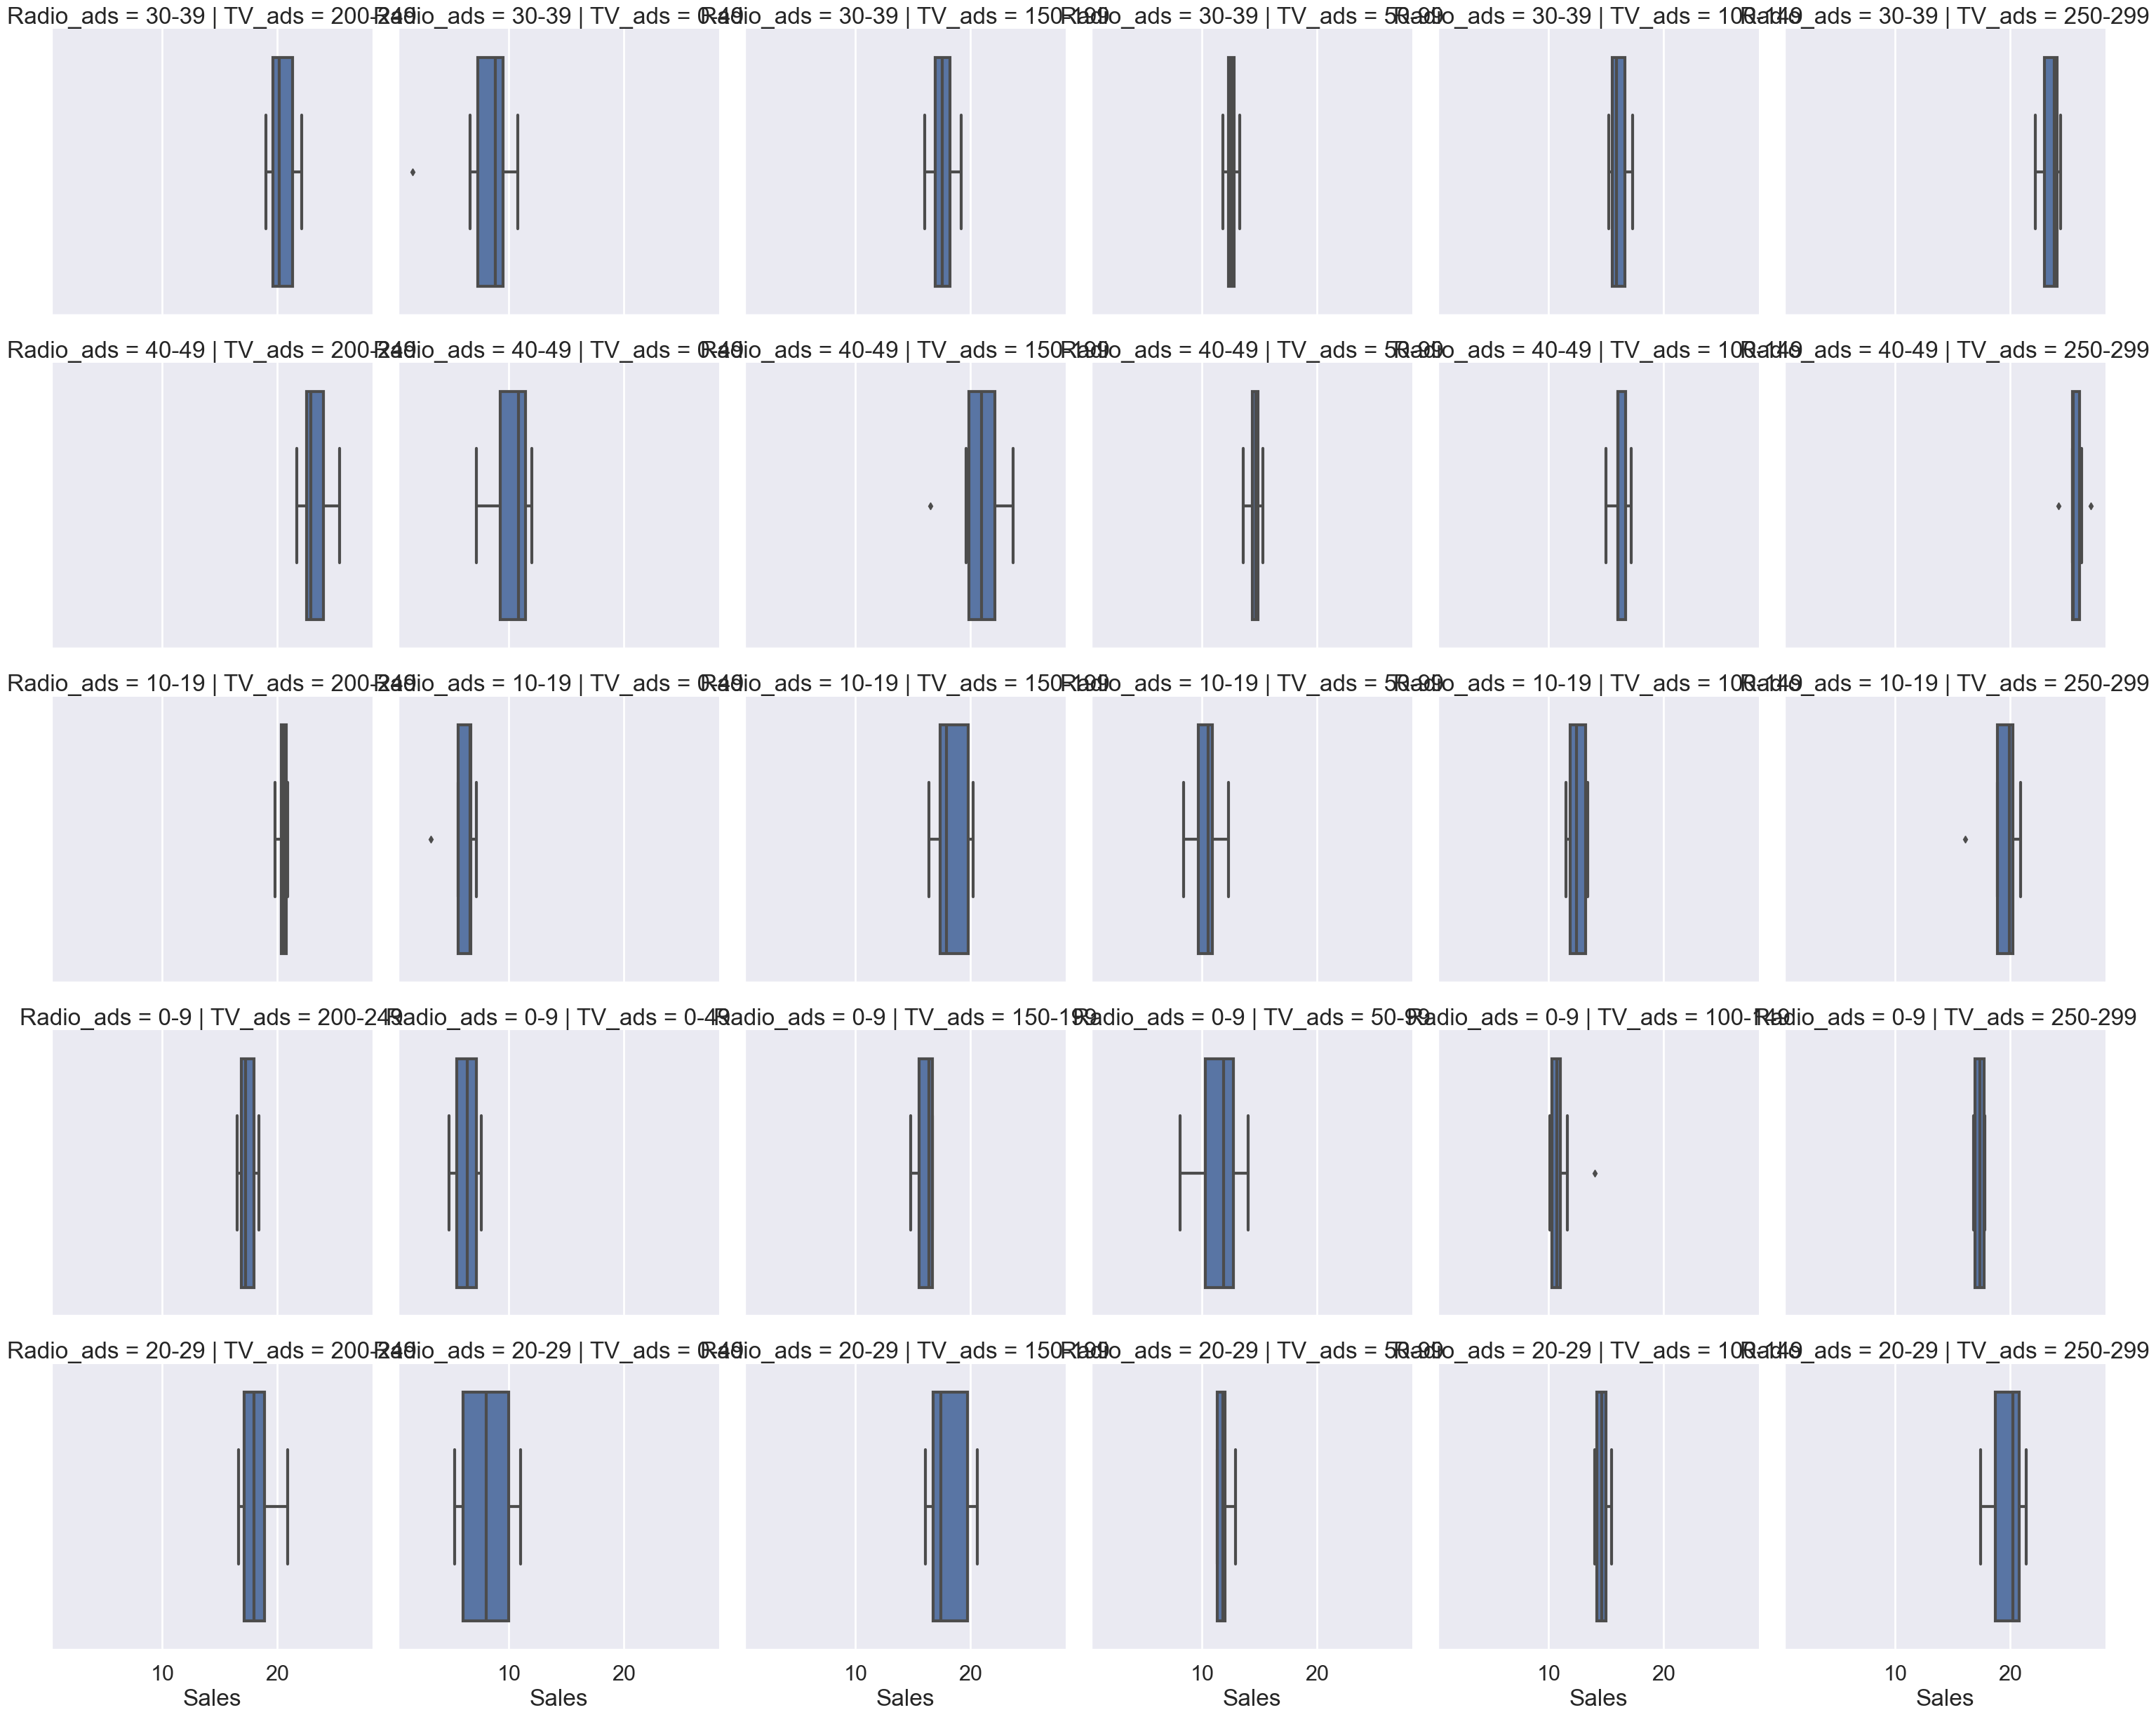

In [29]:
sns.set_context('poster')
sns.catplot(kind='box', x='Sales', col='TV_ads', row='Radio_ads', data=sales);

<AxesSubplot:xlabel='TV_ads', ylabel='Sales'>

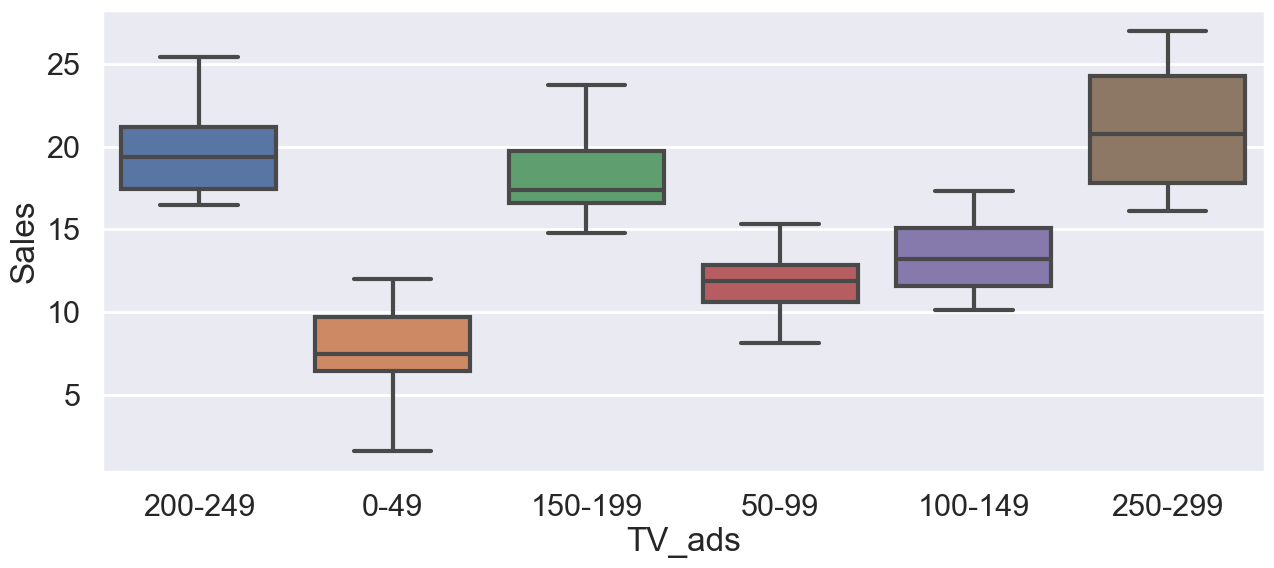

In [30]:
plt.figure(figsize=(15,6))
sns.boxplot(x='TV_ads', y='Sales', data=sales)

<AxesSubplot:xlabel='Radio_ads', ylabel='Sales'>

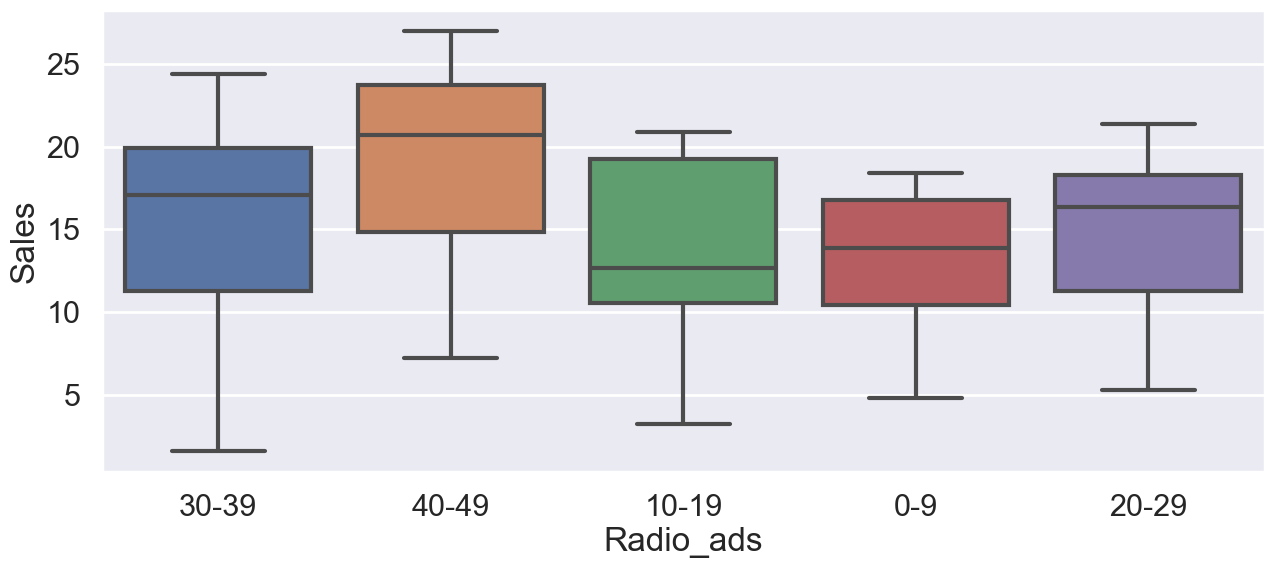

In [31]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Radio_ads', y='Sales', data=sales)

<AxesSubplot:xlabel='Newspaper_ads', ylabel='Sales'>

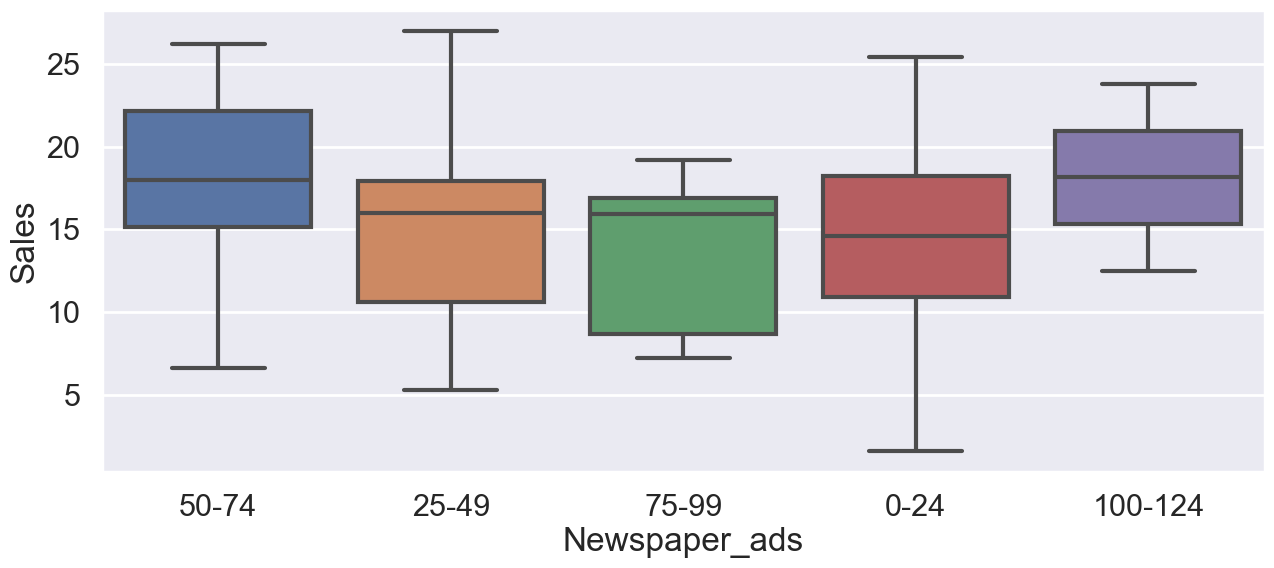

In [32]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Newspaper_ads', y='Sales', data=sales)

In [33]:
total_spending = advertisment[['TV', 'Radio', 'Newspaper']].sum()

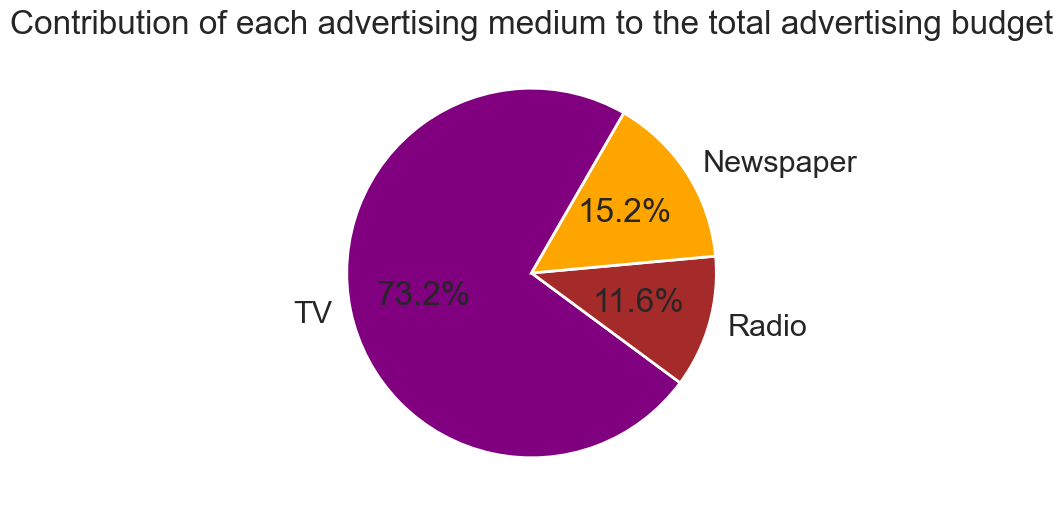

In [34]:
plt.figure(figsize=(15,6))
plt.pie(total_spending, labels=['TV', 'Radio', 'Newspaper'], startangle=60, autopct='%1.1f%%', colors=['Purple','Brown','Orange'])
plt.title('Contribution of each advertising medium to the total advertising budget')
plt.show()

Using heatmap to check out the correlation between explanatory and response variables.

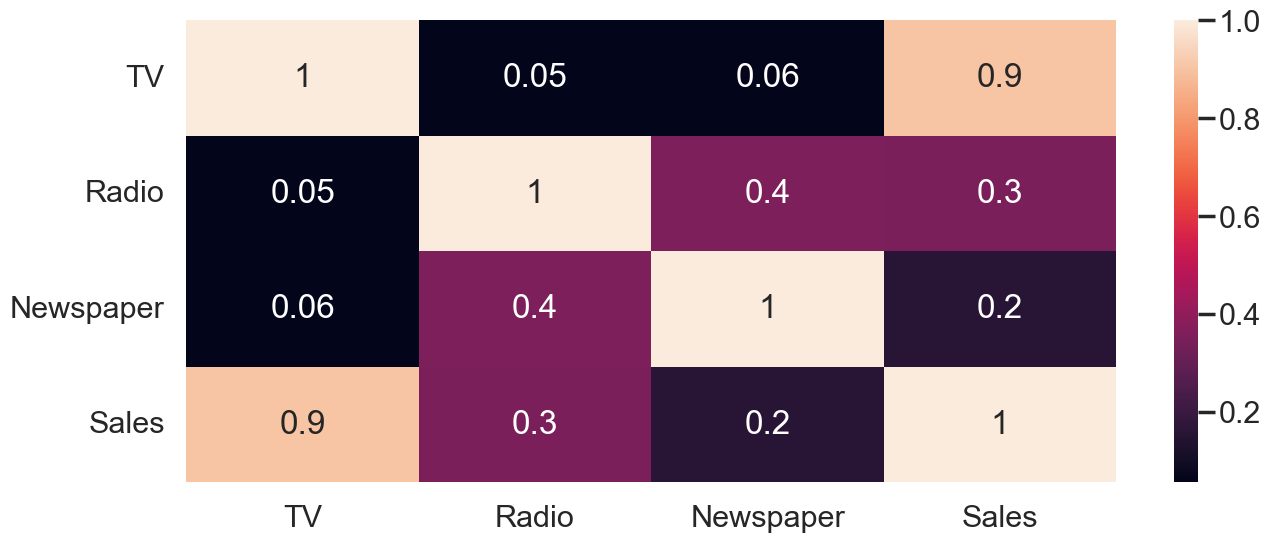

In [35]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
cor = advertisment.corr() 
sns.heatmap(cor, annot=True, fmt='.1g');

### 5. Applying machine learning model

#### Creating Independent and Dependent Variables

In [36]:
X=advertisment.drop(["Sales"], axis=1)
Y=advertisment[['Sales']]

In [37]:
print(X.shape)
print(Y.shape)

(200, 3)
(200, 1)


#### Train Test Splitting

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.30, random_state=5,shuffle=True)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(140, 3) (140, 1)
(60, 3) (60, 1)


In [39]:
X_train.head(2)

,TV,Radio,Newspaper
170,50.0,11.6,18.4
182,56.2,5.7,29.7


In [40]:
Y_train.head(2)

,Sales
170,8.4
182,8.7


In [41]:
X_test.head(2)

,TV,Radio,Newspaper
119,19.4,16.0,22.3
77,120.5,28.5,14.2


In [42]:
Y_test.head(2)

,Sales
119,6.6
77,14.2


### Linear Regression

#### Model Training

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

#### Making Prediction

In [44]:
pred_1 = model.predict(X_test)
pred_2 = model.predict(X_train)

In [45]:
model.coef_

array([[ 0.05441361,  0.109097  , -0.0013876 ]])

In [46]:
model.intercept_

array([4.63830571])

### 6. Model Evaluation

In [51]:
Y_test.head()

,Sales
119,6.6
77,14.2
148,10.9
149,10.1
154,20.6


In [52]:
pred_1[:5]

array([[ 7.40853843],
       [14.28470661],
       [11.08611981],
       [ 9.85671235],
       [17.14594651]])

#### Checking R2 Score

In [47]:
from sklearn.metrics import r2_score
test_r2=r2_score(Y_test,pred_1)
train_r2=r2_score(Y_train,pred_2)

In [48]:
print('R2 score for testing:',test_r2 )
print('R2 score for training:',train_r2 )

R2 score for testing: 0.9227214073019624
R2 score for training: 0.8951369342813063


#### Adjusted R2 Score

In [49]:
def adjR2 (xtest,ytest,r2):
    n = len(ytest)
    k = xtest.shape[-1]
    adj_r2 = 1 - ((1 - r2)*(n - 1)) / (n - k -1)
    print('The adjusted R2 is:', adj_r2)

In [50]:
adjR2(X_test,Y_test,test_r2)
adjR2(X_train,Y_train,train_r2)

The adjusted R2 is: 0.918581482693139
The adjusted R2 is: 0.8928237784198645


#### Final Data Frame

In [54]:
x = X_test.copy()
x['predicted sale'] = pred_1
x['actual sale'] = Y_test

In [55]:
x.head()

,TV,Radio,Newspaper,predicted sale,actual sale
119,19.4,16.0,22.3,7.408538,6.6
77,120.5,28.5,14.2,14.284707,14.2
148,38.0,40.3,11.9,11.086120,10.9
149,44.7,25.8,20.6,9.856712,10.1
154,187.8,21.1,9.5,17.145947,20.6
